In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [7]:
dataset_train_path = "/content/drive/MyDrive/Colab Notebooks/PyLearn7-Assignment54/train"
width = height = 224

idg = ImageDataGenerator(
    rescale=1/255,
    validation_split = 0.2,

    # data augmentation
    rotation_range=40,
    zoom_range=0.4,
    horizontal_flip=True,

)

dataset_train = idg.flow_from_directory(
    dataset_train_path,
    shuffle=True,
    # save_to_dir="train_augmentation",
    subset="training",
    target_size=(width, height)
)

dataset_validation = idg.flow_from_directory(
    dataset_train_path,
    shuffle=False,
    subset="validation",
    target_size=(width, height)
)

Found 823 images belonging to 17 classes.
Found 197 images belonging to 17 classes.


### Create Model

In [8]:
base_model = tf.keras.applications.MobileNetV2()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",     #Transfer Learning
    input_shape=(width, height, 3),
    pooling="avg"
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
for layer in base_model.layers[0:-4]:
    layer.trainable=False

In [11]:
model = Sequential([
    base_model,
    layers.Dense(17, activation='softmax')
])

In [ ]:
model.summary()

In [12]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=RMSprop(learning_rate=1e-4),      #0.0001
    metrics=['accuracy']
)

In [14]:
history = model.fit(dataset_train,
                    validation_data=dataset_validation,
                    epochs=30,
                    )

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 445s 13s/step - accuracy: 0.2171 - loss: 2.6270 - val_accuracy: 0.5178 - val_loss: 1.7052
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 569ms/step - accuracy: 0.6435 - loss: 1.4375 - val_accuracy: 0.6041 - val_loss: 1.3600
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 628ms/step - accuracy: 0.7963 - loss: 0.9116 - val_accuracy: 0.6650 - val_loss: 1.0907
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 540ms/step - accuracy: 0.8530 - loss: 0.7062 - val_accuracy: 0.6802 - val_loss: 0.9791
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 632ms/step - accuracy: 0.8787 - loss: 0.5845 - val_accuracy: 0.7107 - val_loss: 0.8466
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 545ms/step - accuracy: 0.9178 - loss: 0.4386 - val_accuracy: 0.7766 - val_loss: 0.6930
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 20s 547ms/step - accuracy: 0.9387 - loss: 0.3798 - val_accuracy: 0.7563 - val_loss: 0.7070
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 603ms/step - accuracy: 0.9525 - loss: 0.2877 - val_accuracy: 0.7665

In [20]:
loss , accuracy = model.evaluate(dataset_validation)
print("validation loss:" , loss)
print("validation accuracy:" ,accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 440ms/step - accuracy: 0.8322 - loss: 0.4237
validation loss: 0.34277939796447754
validation accuracy: 0.8730964660644531


In [17]:
model.save("/content/drive/MyDrive/Colab Notebooks/PyLearn7-Assignment54/17_flowers_weights.h5")
model.save("/content/drive/MyDrive/Colab Notebooks/PyLearn7-Assignment54/17_flowers_weights.keras")

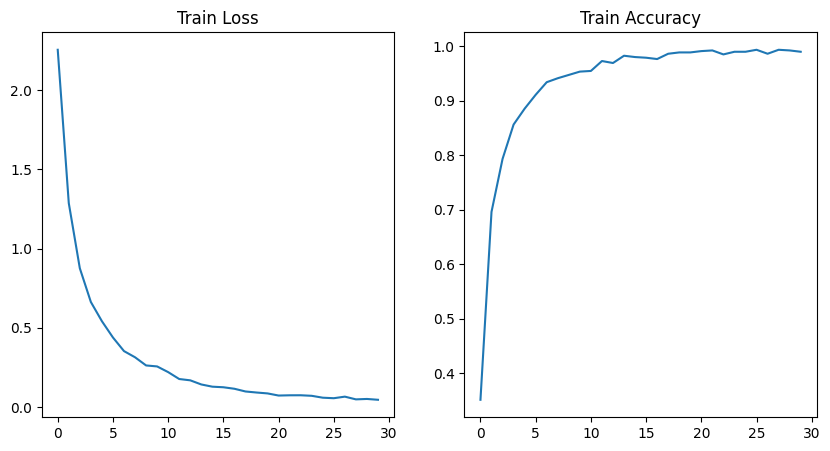

In [21]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(history.history['loss'])
ax1.set_title("Train Loss")
ax2.plot(history.history['accuracy'])
ax2.set_title("Train Accuracy")
plt.show()

In [23]:
dataset_test_path = "/content/drive/MyDrive/Colab Notebooks/PyLearn7-Assignment54/test"

idg = ImageDataGenerator(
    rescale=1/255
)

dataset_test = idg.flow_from_directory(
    dataset_test_path,
    shuffle=False,
    target_size=(width, height)
)

Found 340 images belonging to 17 classes.


In [24]:
loss , accuracy = model.evaluate(dataset_test)
print("test loss:" , loss)
print("test accuracy:" ,accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 122s 12s/step - accuracy: 0.8753 - loss: 0.3444
test loss: 0.2737915813922882
test accuracy: 0.908823549747467


In [25]:
y_pred = model.predict(dataset_test)
y_predict = np.argmax(y_pred , axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 417ms/step


In [26]:
y_pred

array([[7.5680602e-01, 5.5357803e-05, 3.4219911e-04, ..., 2.4272264e-04,
        6.4475234e-03, 2.3740418e-03],
       [1.8447503e-01, 2.5567928e-04, 3.6235240e-03, ..., 4.3490771e-04,
        4.4340875e-02, 1.8461892e-02],
       [5.5139214e-01, 4.7274493e-06, 1.5525467e-04, ..., 5.1474199e-03,
        5.3705601e-04, 6.9742155e-04],
       ...,
       [2.3120325e-05, 4.7419179e-04, 1.7447452e-04, ..., 3.4999539e-04,
        1.1031801e-03, 9.6090269e-01],
       [1.4590898e-06, 9.7346947e-06, 8.4194579e-07, ..., 3.5024084e-06,
        2.8526431e-06, 9.9682802e-01],
       [4.6966485e-05, 9.2517286e-05, 2.3872630e-05, ..., 6.0355892e-06,
        2.2960371e-06, 9.9170661e-01]], dtype=float32)

In [27]:
y_predict

array([ 0, 12,  0, 12, 10,  0,  0,  8,  0,  0,  3,  0, 12, 12,  0,  0,  0,
        0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  7,  2,  2,  7,  2,  2,  2,  2,  2,
        2,  2,  7,  2,  2,  2,  2,  2,  2, 15,  1,  3,  3,  3,  3,  3,  3,
        3,  5,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  4,  4,  4,
        4,  4, 16,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  0,  4,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 15,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6, 13,  6,  4,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  2,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9, 11,  9,  5,  9,  9,  9,  9,  9,
        9,  9, 10,  9, 10, 10, 10, 10, 11, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10

In [28]:
dataset_validation.classes

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16], dtype=int32)

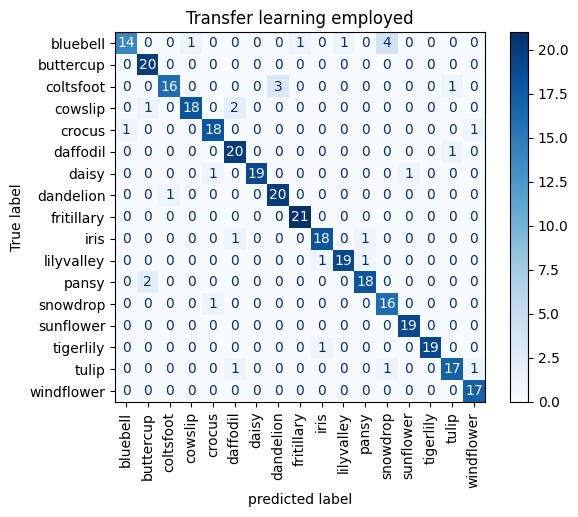

In [30]:
from sklearn import metrics

confusion_mat = metrics.confusion_matrix(dataset_test.classes, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat,
            display_labels = ['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 'daffodil',
                              'daisy', 'dandelion', 'fritillary', 'iris', 'lilyvalley', 'pansy',
                              'snowdrop', 'sunflower', 'tigerlily', 'tulip', 'windflower'])

cm_display.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Transfer learning employed")
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()

### inference code:

In [ ]:
import cv2

image = cv2.imread("sunflower.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image , (224, 224))
image = image // 255.0
image = image.reshape(1, 224, 224, 3)

output = model.predict(image)
predicted_class = np.argmax(output)

labels = ['bluebell', 'buttercup', 'coltsfoot', 'cowslip', 'crocus', 'daffodil',
          'daisy', 'dandelion', 'fritillary', 'iris', 'lilyvalley', 'pansy',
          'snowdrop', 'sunflower', 'tigerlily', 'tulip', 'windflower']

labels[predicted_class]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


'sunflower'